In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np

#preprocessing block

opinions = pd.read_csv("StarWarsOpinions.csv", encoding='latin1')
first_qs = opinions.columns.to_list()
second_qs = opinions.iloc[0].values

new_headers = ["RespondentID", "seen_any_films", "is_fan", "seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6", \
               "pref_1", "pref_2", "pref_3", "pref_4", "pref_5", "pref_6", "han_solo", "luke_skywalker", "leia_organa", \
               "anakin_skywalker", "obi_wan_kenobi", "palpatine", "darth_vader", "lando_calrissian", "boba_fett", "c3po",\
               "r2d2", "jar_jar", "padme_amidala", "yoda", "shot_first", "expanded_universe", "expanded_univ_is_fan", "star_trek_is_fan", \
               "gender", "age", "income", "education", "location"]

opinions.columns = new_headers
opinions = opinions.drop(0)
opinions = opinions.drop(['seen_any_films', "expanded_univ_is_fan", "RespondentID"], axis=1)
opinions["seen_1"] = opinions["seen_1"].fillna(0)
opinions["seen_1"] = (opinions["seen_1"] != 0).astype(int)

opinions["seen_2"] = opinions["seen_2"].fillna(0)
opinions["seen_2"] = (opinions["seen_2"] != 0).astype(int)

opinions["seen_3"] = opinions["seen_3"].fillna(0)
opinions["seen_3"] = (opinions["seen_3"] != 0).astype(int)

opinions["seen_4"] = opinions["seen_4"].fillna(0)
opinions["seen_4"] = (opinions["seen_4"] != 0).astype(int)

opinions["seen_5"] = opinions["seen_5"].fillna(0)
opinions["seen_5"] = (opinions["seen_5"] != 0).astype(int)

opinions["seen_6"] = opinions["seen_6"].fillna(0)
opinions["seen_6"] = (opinions["seen_6"] != 0).astype(int)
df_filtered = opinions.dropna(subset=['is_fan','income','gender','age','education','location','pref_1','pref_3'])

# Maps the categorical favorability to a numeric value 1-5
custom_mapping = {'Very favorably': 5, 'Somewhat favorably': 4, \
                  'Neither favorably nor unfavorably (neutral)': 3, \
                  'Somewhat unfavorably': 2, 'Very unfavorably': 1, \
                  'Unfamiliar (N/A)': 3}

# Use replace to map categories to numbers
df_filtered['han_solo'] = df_filtered['han_solo'].replace(custom_mapping).fillna(3)
df_filtered['luke_skywalker'] = df_filtered['luke_skywalker'].replace(custom_mapping).fillna(3)
df_filtered['leia_organa'] = df_filtered['leia_organa'].replace(custom_mapping).fillna(3)
df_filtered['anakin_skywalker'] = df_filtered['anakin_skywalker'].replace(custom_mapping).fillna(3)
df_filtered['obi_wan_kenobi'] = df_filtered['obi_wan_kenobi'].replace(custom_mapping).fillna(3)
df_filtered['palpatine'] = df_filtered['palpatine'].replace(custom_mapping).fillna(3)
df_filtered['darth_vader'] = df_filtered['darth_vader'].replace(custom_mapping).fillna(3)
df_filtered['lando_calrissian'] = df_filtered['lando_calrissian'].replace(custom_mapping).fillna(3)
df_filtered['boba_fett'] = df_filtered['boba_fett'].replace(custom_mapping).fillna(3)
df_filtered['c3po'] = df_filtered['c3po'].replace(custom_mapping).fillna(3)
df_filtered['r2d2'] = df_filtered['r2d2'].replace(custom_mapping).fillna(3)
df_filtered['jar_jar'] = df_filtered['jar_jar'].replace(custom_mapping).fillna(3)
df_filtered['padme_amidala'] = df_filtered['padme_amidala'].replace(custom_mapping).fillna(3)
df_filtered['yoda'] = df_filtered['yoda'].replace(custom_mapping).fillna(3)
df_filtered[df_filtered['pref_1'].isna()]

import numpy as np
yes_no_mapping = {'Yes':1, 'No':0}
shot_first_mapping = {'Han':2, 'Greedo':1, "I don't understand this question":0}
gender_mapping = {'Male':0, 'Female':1}
age_mapping = {'18-29':0,'30-44':1,'45-60':2, '> 60':3}
income_mapping = {'$0 - $24,999':0, '$100,000 - $149,999':4, '$150,000+':5,
       '$25,000 - $49,999':1, '$50,000 - $99,999':3}
education_mapping = {'Bachelor degree':3, 'Graduate degree':4, 'High school degree':1,
       'Less than high school degree':0, 'Some college or Associate degree':2}
location_mapping = {'East North Central':0, 'East South Central':1, 'Middle Atlantic':2,
       'Mountain':3, 'New England':4, 'Pacific':5, 'South Atlantic':6,
       'West North Central':7, 'West South Central':8}

#np.unique(df_filtered['age'])


df_filtered['is_fan'] = df_filtered['is_fan'].replace(yes_no_mapping)
df_filtered['expanded_universe'] = df_filtered['expanded_universe'].replace(yes_no_mapping)
df_filtered['star_trek_is_fan'] = df_filtered['star_trek_is_fan'].replace(yes_no_mapping)
df_filtered['shot_first'] = df_filtered['shot_first'].replace(shot_first_mapping)
df_filtered['gender'] = df_filtered['gender'].replace(gender_mapping)
df_filtered['age'] = df_filtered['age'].replace(age_mapping)
df_filtered['income'] = df_filtered['income'].replace(income_mapping)
df_filtered['education'] = df_filtered['education'].replace(education_mapping)
df_filtered['location'] = df_filtered['location'].replace(location_mapping)
#np.unique(df_filtered['location'])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# base predicition of off one character's ratings
y = df_filtered['yoda'] # only the character column
X = df_filtered.drop(['yoda'], axis=1) #exclude the character column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 9.16230270e-02  1.35698551e-01 -1.46995965e-01  1.92161973e-01
  6.98082778e-02  2.29970434e-02 -2.65437338e-02 -3.56064237e-02
  2.78234532e-02  1.67280714e-02  1.34627860e-02 -1.77410014e-04
 -2.22304768e-02  8.37997915e-02  6.39841695e-02  1.42680525e-01
 -1.54988182e-02  2.07647739e-01 -3.13491065e-02 -5.03328183e-03
  3.67767885e-02 -1.92548982e-02  7.98624461e-02  1.51645331e-01
 -4.72004102e-03  1.03111315e-01  3.82483028e-02 -9.01245159e-02
  1.21789669e-02  6.54084399e-02 -4.41353056e-02 -7.45683402e-03
  8.71832018e-03 -1.54667227e-02]
Mean squared error: 0.30
Coefficient of determination: 0.30


In [ ]:
# try logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['2', '3', '4', '5']
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.38      0.30      0.33        10
           4       0.44      0.23      0.30        30
           5       0.78      0.92      0.85        93

    accuracy                           0.72       134
   macro avg       0.40      0.36      0.37       134
weighted avg       0.67      0.72      0.68       134



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
print(X["han_solo"].shape, X["leia_organa"].shape, y.shape)

(670,) (670,) (670,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

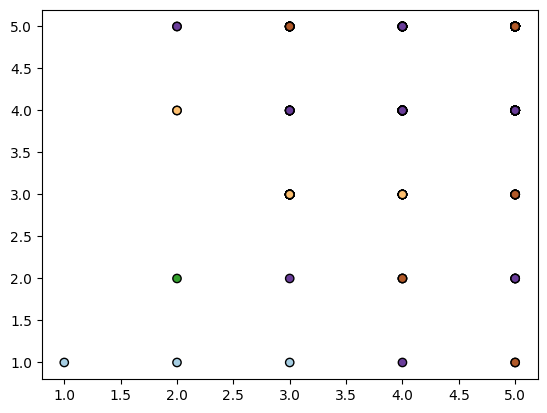

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Plot the decision boundary
plt.scatter(X["han_solo"], X["leia_organa"], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Generate decision boundary
x_min, x_max = X["han_solo"].min() - 1, X["han_solo"].max() + 1
y_min, y_max = X["leia_organa"].min() - 1, X["leia_organa"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (2D)')
plt.show()